# Вариант

1. Загрузить датасет в Python.



In [128]:
# импорт библиотек
import numpy as np
import pandas as pd

# загрузка данных из файла
data = pd.read_csv('diabetes.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. Описать набор данных и решаемую задачу.


Необходимо решить задачу классификации по данным людей и разбить выборку на 2 класса (больных и здоровых)

In [129]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Минимальный возраст пациентов - 21

Максимальный Индекс тела - 67.1

Количество значений в столбце Инсулин, как и во всей таблице - 768

In [130]:
data['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

Количество элементов по уникальным значениям

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
data.shape

(768, 9)

В датасете 768 элемент и 9 признаков, включая целевой

In [39]:
# строим матрицу корреляций
correll = data.corr()
correll

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


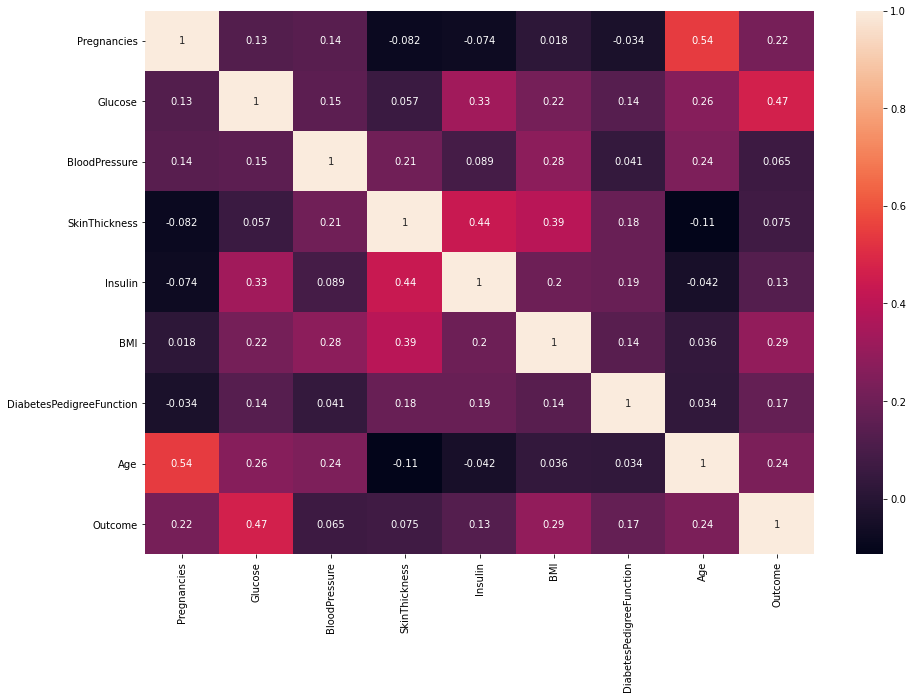

In [44]:
import seaborn as sns

# строим тепловую карту корреляций
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correll, annot=True);

3. Выделить целевую переменную и факторные переменные.


Целевая переменная - признак Outcome. Факторные переменные - остальные признаки

In [28]:
# создаем 2 новых датафрейма
y = pd.DataFrame(data['Outcome'])
x = pd.DataFrame(data.drop(['Outcome'], axis=1))
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


4. Удалить ненужные данные, проанализировать отсутствующие значения.


Я считаю признак беременности наименее значимым, потому что в выборке присутсвуют как женщины, так и мужчины, и у вторых этот признак равен 0

In [29]:
# удалем лишний столбец
x.drop(['Pregnancies'], axis=1, inplace = True)

In [31]:
# Проверяем пропущенные значения
x.isna().sum(axis=0)

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [ ]:
# заполнение пропущенных значений
x['vehicleType'].fillna(x['vehicleType'].mode()[0], inplace=True) # категориальные
x['gearbox'].fillna(x['gearbox'].mean()[0], inplace=True) # количественные

5. Прокомментировать количественные параметры датасета.


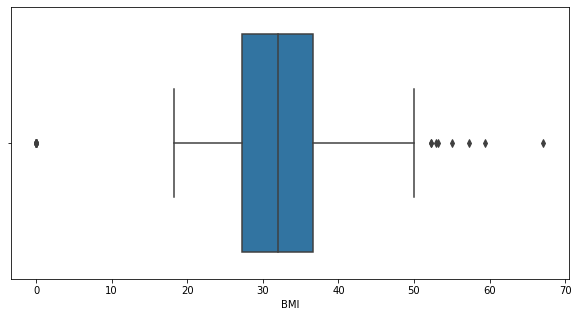

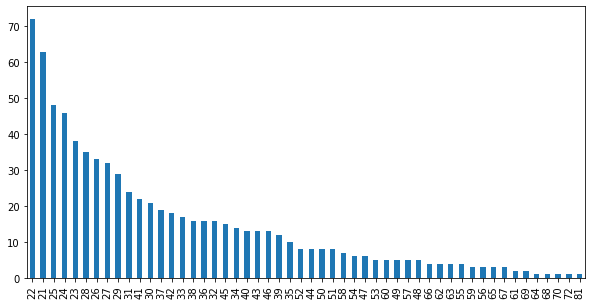

In [35]:
# импорт библиотек
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x = data["BMI"]);

fig, ax = plt.subplots(figsize=(10,5))
data['Age'].value_counts().plot(kind='bar');

По первому графику можно посмотреть наличие выбросов признака НАЗВАНИЕ

По второму графику видно экспоненциальное распределение возраста пациентов

6. Разбить выборку на обучающую и тестовую.


In [ ]:
from sklearn.model_selection import train_test_split

# разбиение на тестовую и обучающую выборку
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% обучающей выборки

7. Работа по вариантам.

## Вариант 1

Вариант 1. Очистка данных и обучение моделей.
Данный вариант предполагает фокусировку на обучении нескольких видов моделей обучения с учителем. В зависимости от набора данных, может предполагаться задача классификации и регрессии. Необходимо после минимальной подготовки датасета к обучению обучить несколько моделей и сравнить их эффективность.


Предобработка была произведена выше

In [ ]:
# создаем сводную таблицу метрик моделей
scores = pd.DataFrame(
    columns=['accuracy', 'precision', 'recall', 'f1_score', 'time'],
    index=[
        'LogisticRegression',
        'SVC linear',
        'SVC gauss',
        'KNeighborsClassifier',
        'MLP',
        'LinearDiscriminantAnalysis'
    ]
)


In [ ]:
from sklearn import metrics

def get_metrics(y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    return pd.Series(
        (accuracy, precision, recall, f1_score),
        index=['accuracy', 'precision', 'recall', 'f1_score']
    )

In [ ]:
import time

def model_and_metrics(model):
    start = time.time() # точка отсчета времени
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)  
    end = time.time() - start # время работы программы
    returned = get_metrics(y_test, y_pred).append(pd.Series((end), index = ['time']))
    return returned

In [ ]:
from sklearn.linear_model import LogisticRegression

# Логистическая регрессия
model = LogisticRegression()
scores.iloc[0] = model_and_metrics(model)

In [ ]:
from sklearn import svm

# Метод опорных векторов c ядром линейной функции
model = svm.SVC(kernel='linear')
scores.iloc[1] = model_and_metrics(model)

In [ ]:
from sklearn import svm

# Метод опорных векторов c ядром радиальной базисной функции
model = svm.SVC(kernel='rbf')
scores.iloc[2] = model_and_metrics(model)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# k ближайших соседей
model = KNeighborsClassifier()
scores.iloc[3] = model_and_metrics(model)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Многоуровневый Перцептрон
model = MLPClassifier()
scores.iloc[4] = model_and_metrics(model)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Линейный дискриминантный анализ
model = LinearDiscriminantAnalysis()
scores.iloc[5] = model_and_metrics(model)

После обучения моделей можно сравнить их качество и выделить лучшие

In [ ]:
scores

#### ROC-кривые

In [ ]:
from yellowbrick.classifier import ROCAUC

def ROC_AUC(model):
    visualizer = ROCAUC(model, classes=["not_spam", "is_spam"])

    visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(x_test, y_test)        # Evaluate the model on the test data
    visualizer.show()                       # Finalize and show the figure

Грубо говоря, ROC кривая показывает процентное соотношение пар объектов, которая модель верно классифицировала. AOC - это площадь под графиком, в числовом формате говорящая о качестве

In [ ]:
model = LogisticRegression(multi_class="auto", solver="liblinear")
ROC_AUC(model)

#### precision-recall кривые

In [ ]:
import matplotlib.pyplot as plt

from yellowbrick.classifier import PrecisionRecallCurve

def precision_recall(model):
    # Create the visualizer, fit, score, and show it
    viz = PrecisionRecallCurve(model)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()

precision - точность TP/TP+FP = доля верно классифицированных объектов

recall - полнота TP/TP+FN = доля верно классифицированных объектов из всех

In [ ]:
model = LogisticRegression(multi_class="auto", solver="liblinear")
precision_recall(model)

#### Матрицы ошибок

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

[TP, FP, \
FN, TN]

- TP — true positive: классификатор верно отнёс объект к рассматриваемому классу.
- TN — true negative: классификатор верно утверждает, что объект не принадлежит к рассматриваемому классу.
- FP — false positive: классификатор неверно отнёс объект к рассматриваемому классу.
- FN — false negative: классификатор неверно утверждает, что объект не принадлежит к рассматриваемому классу.

доля верно классификацированных объектов (recall) \
доля ошибочно классификацированных объектов (1-precision)

## Вариант 2

Вариант 2. Описательный анализ и визуализация данных.
Данный вариант предполагает фокусировку на исследовании данных и визуализации. При решении этого варианта следует провести как можно более подробный описательный анализ данных с использованием максимального спектра средств визуализации. При этом следует делать значимые выводы об обнаруженных в данных закономерностях.


In [45]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


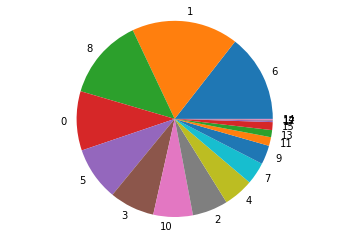

In [52]:
vals = data.groupby(data['Pregnancies'])['Age'].count()
labels = data['Pregnancies'].unique()
fig, ax = plt.subplots()
# explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0) # выдвинутый сектор
ax.pie(vals, labels=labels) # explode=explode
ax.axis("equal");

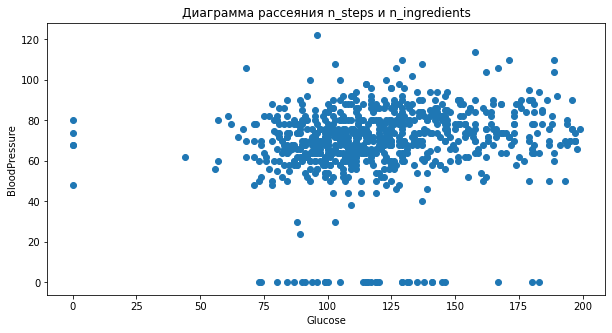

In [57]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(x = data['Glucose'], y = data['BloodPressure'])

plt.title('Диаграмма рассеяния n_steps и n_ingredients') #title
plt.xlabel('Glucose') #x label
plt.ylabel('BloodPressure') #y label
plt.show();

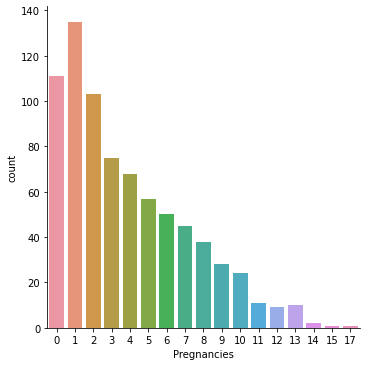

In [59]:
sns.catplot(data=data, x='Pregnancies', kind="count"); 

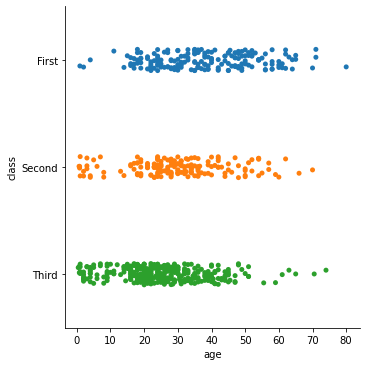

In [63]:
df = sns.load_dataset("titanic")
sns.catplot(data=df, x="age", y="class")

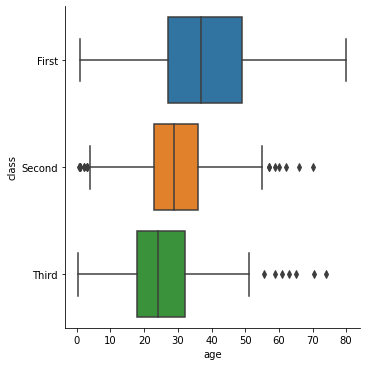

In [64]:
sns.catplot(data=df, x="age", y="class", kind="box")

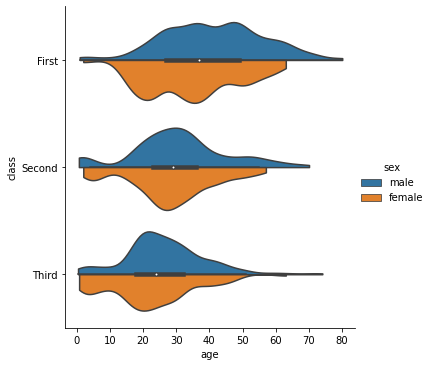

In [65]:
sns.catplot(
    data=df, x="age", y="class", hue="sex",
    kind="violin", bw=.25, cut=0, split=True,
)

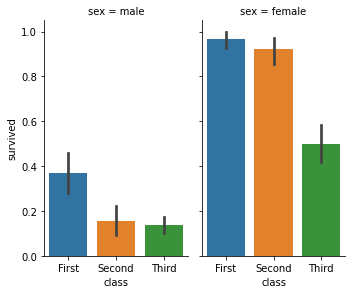

In [66]:
sns.catplot(
    data=df, x="class", y="survived", col="sex",
    kind="bar", height=4, aspect=.6,
)

In [67]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


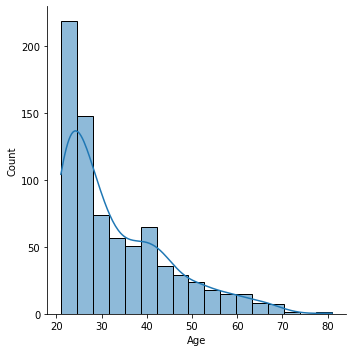

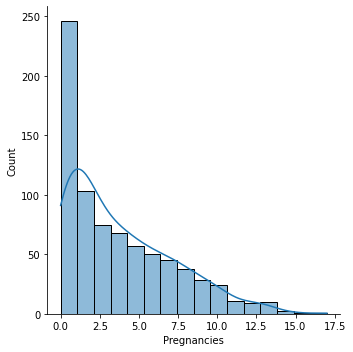

In [69]:
sns.displot(x=data['Age'], kde=True, label='Age') # kde - график плотности
sns.displot(x=data['Pregnancies'], kde=True)

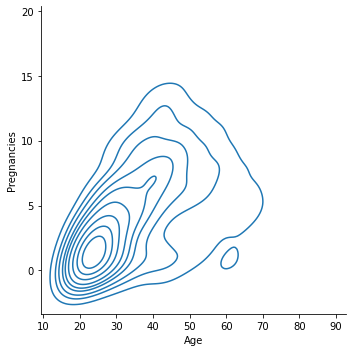

In [70]:
sns.displot(x="Age",
            y="Pregnancies",
            kind='kde',
            data=data);

In [ ]:
g = sns.catplot(x="Sex", y='Fare', row="Embarked",
                   col='Survived', data=train_df,kind ='bar')

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


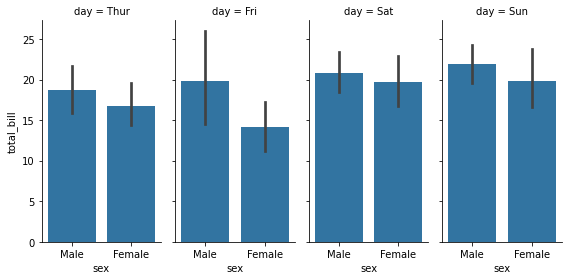

In [77]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips,col='day',height=4,aspect=0.5) # aspect - относительная высота
g.map(sns.barplot,"sex","total_bill")

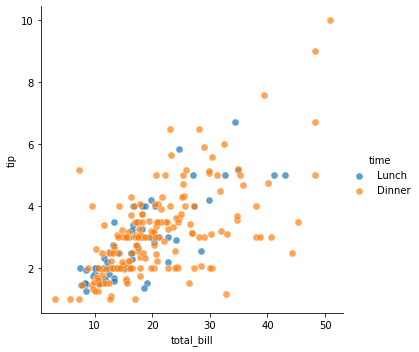

In [74]:
g=sns.FacetGrid(tips,hue="time",height=5)
g.map(plt.scatter,"total_bill","tip",s=50, alpha=0.7, linewidth=0.5,edgecolor="white")
g.add_legend()

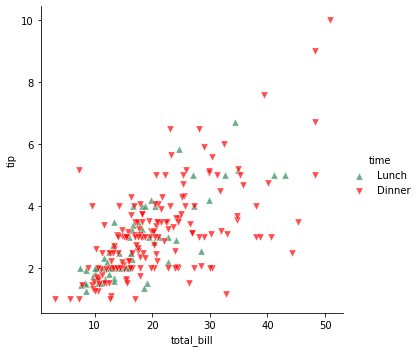

In [73]:
g=sns.FacetGrid(tips,hue="time",palette=dict(Lunch="seagreen",Dinner="red"),size=5,hue_kws={"marker":["^","v"]})
g.map(plt.scatter,"total_bill","tip",s=50, alpha=0.7, linewidth=0.5,edgecolor="white")
g.add_legend()

## Вариант 3

Вариант 3. Построение модели и оптимизация гиперпараметров.
Данный вариант предполагает фокусировку на процессе улучшения эффективности модели обучения с учителем. Студенту следует подготовить датасет к обучению, обучить одну из моделей с учителем со значениями гиперпараметров по умолчанию, получить значение эффективности. После этого вручную или автоматически подобрать значения гиперпараметров таким образом, чтобы получить максимальный прирост эффективности.


In [106]:
data = pd.read_csv('credit_data.csv')
data.drop(columns = ['Unnamed: 0'], axis = 1, inplace=True )
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


Заполнение отсутсвующих значений

In [107]:
data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [108]:
data['Saving accounts'].fillna(data['Saving accounts'].mode()[0], inplace=True)
data['Checking account'].fillna(data['Checking account'].mode()[0], inplace=True)

In [109]:
# new_data = pd.get_dummies(data)

In [110]:
# заменяем текстовые значения на присвоенные числа для дальнейшего обучения
data = data.replace({'Sex':{'male':1, 'female':2}})
data = data.replace({'Housing':{'own':1, 'free':2, 'rent':3}})
data = data.replace({'Saving accounts':{'little':1, 'quite rich':2, 'rich':3, 'moderate':4}})
data = data.replace({'Checking account':{'little':1, 'moderate':2, 'rich':3}})
data = data.replace({'Purpose':{'radio/TV':1, 'education':2, 'furniture/equipment':3, 'car':4, 'business':5, 'domestic appliances':6, 'repairs':7, 'vacation/others':8}})
data = data.replace({'Risk':{'good':0, 'bad':1}})

In [111]:
# выделяем целевую переменную
target = data['Risk']
data.drop(columns = ['Risk'], axis = 1, inplace=True )

In [112]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42) # test new_data

In [113]:
from sklearn.preprocessing import StandardScaler

# масштабирование признаков
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)
y_train = np.array(y_train)

In [114]:
# Random Forest случайный лес
# Hyperparameter Tuning оптимизация гиперпараметров

scores_ht = pd.DataFrame(
    columns=['accuracy', 'precision', 'recall', 'f1_score', 'time'],
    index=[
        'RF',
        'RF + HT'
    ]
)

In [115]:
from sklearn import metrics

def get_metrics(y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    return pd.Series(
        (accuracy, precision, recall, f1_score),
        index=['accuracy', 'precision', 'recall', 'f1_score']
    )

In [116]:
import time

def model_and_metrics(model, x_train, y_train, x_test, y_test):
    start = time.time() # точка отсчета времени
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)  
    end = time.time() - start # время работы программы
    returned = get_metrics(y_test, y_pred).append(pd.Series((end), index = ['time']))
    return returned

In [117]:
from sklearn.ensemble import RandomForestClassifier

scores_ht.iloc[0] = model_and_metrics(RandomForestClassifier(), x_train_scaled, y_train, x_test_scaled, y_test)

Подбор гиперпараметров: 
- n_estimators — число «деревьев» в «случайном лесу».
- max_features — число признаков для выбора расщепления.
- max_depth — максимальная глубина деревьев.
- min_samples_split — минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться.
- min_samples_leaf — минимальное число объектов в листьях.
- bootstrap — использование для построения деревьев подвыборки с возвращением.

In [118]:
from sklearn.model_selection import RandomizedSearchCV

# генерируем все возможные виды гиперпараметров
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]

# создаем словарь параметров
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

model = RandomForestClassifier()

# инициализируем функцию подбора параметров
rs = RandomizedSearchCV(model, 
                        param_dist, 
                        n_iter = 100,  
                        verbose = 1, # уровень детализации
                        n_jobs=-1, # использование всех процессов для параллельного выполнения
                        random_state=0)

rs.fit(x_train_scaled, y_train)
rs.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 400,
 'min_samples_split': 23,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 14,
 'bootstrap': False}

результаты работы RandomizedSearchCV

In [119]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,400,23,2,sqrt,14,False,0.71250,0.75000,0.72375,1
1,500,18,7,log2,7,True,0.73125,0.76250,0.72000,2
2,700,23,7,log2,15,False,0.71250,0.74375,0.72000,3
3,700,18,7,sqrt,7,False,0.72500,0.73750,0.71875,4
4,1000,12,7,sqrt,10,True,0.73125,0.75000,0.71750,5
5,600,23,2,sqrt,15,False,0.70000,0.73750,0.71750,6
6,400,23,12,sqrt,11,True,0.73125,0.73750,0.71375,7
7,300,28,7,log2,13,True,0.70625,0.76250,0.71250,8
8,700,12,2,sqrt,13,False,0.68750,0.73750,0.71125,9
9,1000,44,2,sqrt,9,True,0.71875,0.73125,0.71125,9


Теперь создадим столбчатые графики, на которых, по оси Х, расположены значения гиперпараметров, а по оси Y — средние значения, показываемые моделями. Это позволит понять то, какие значения гиперпараметров, в среднем, лучше всего себя показывают.

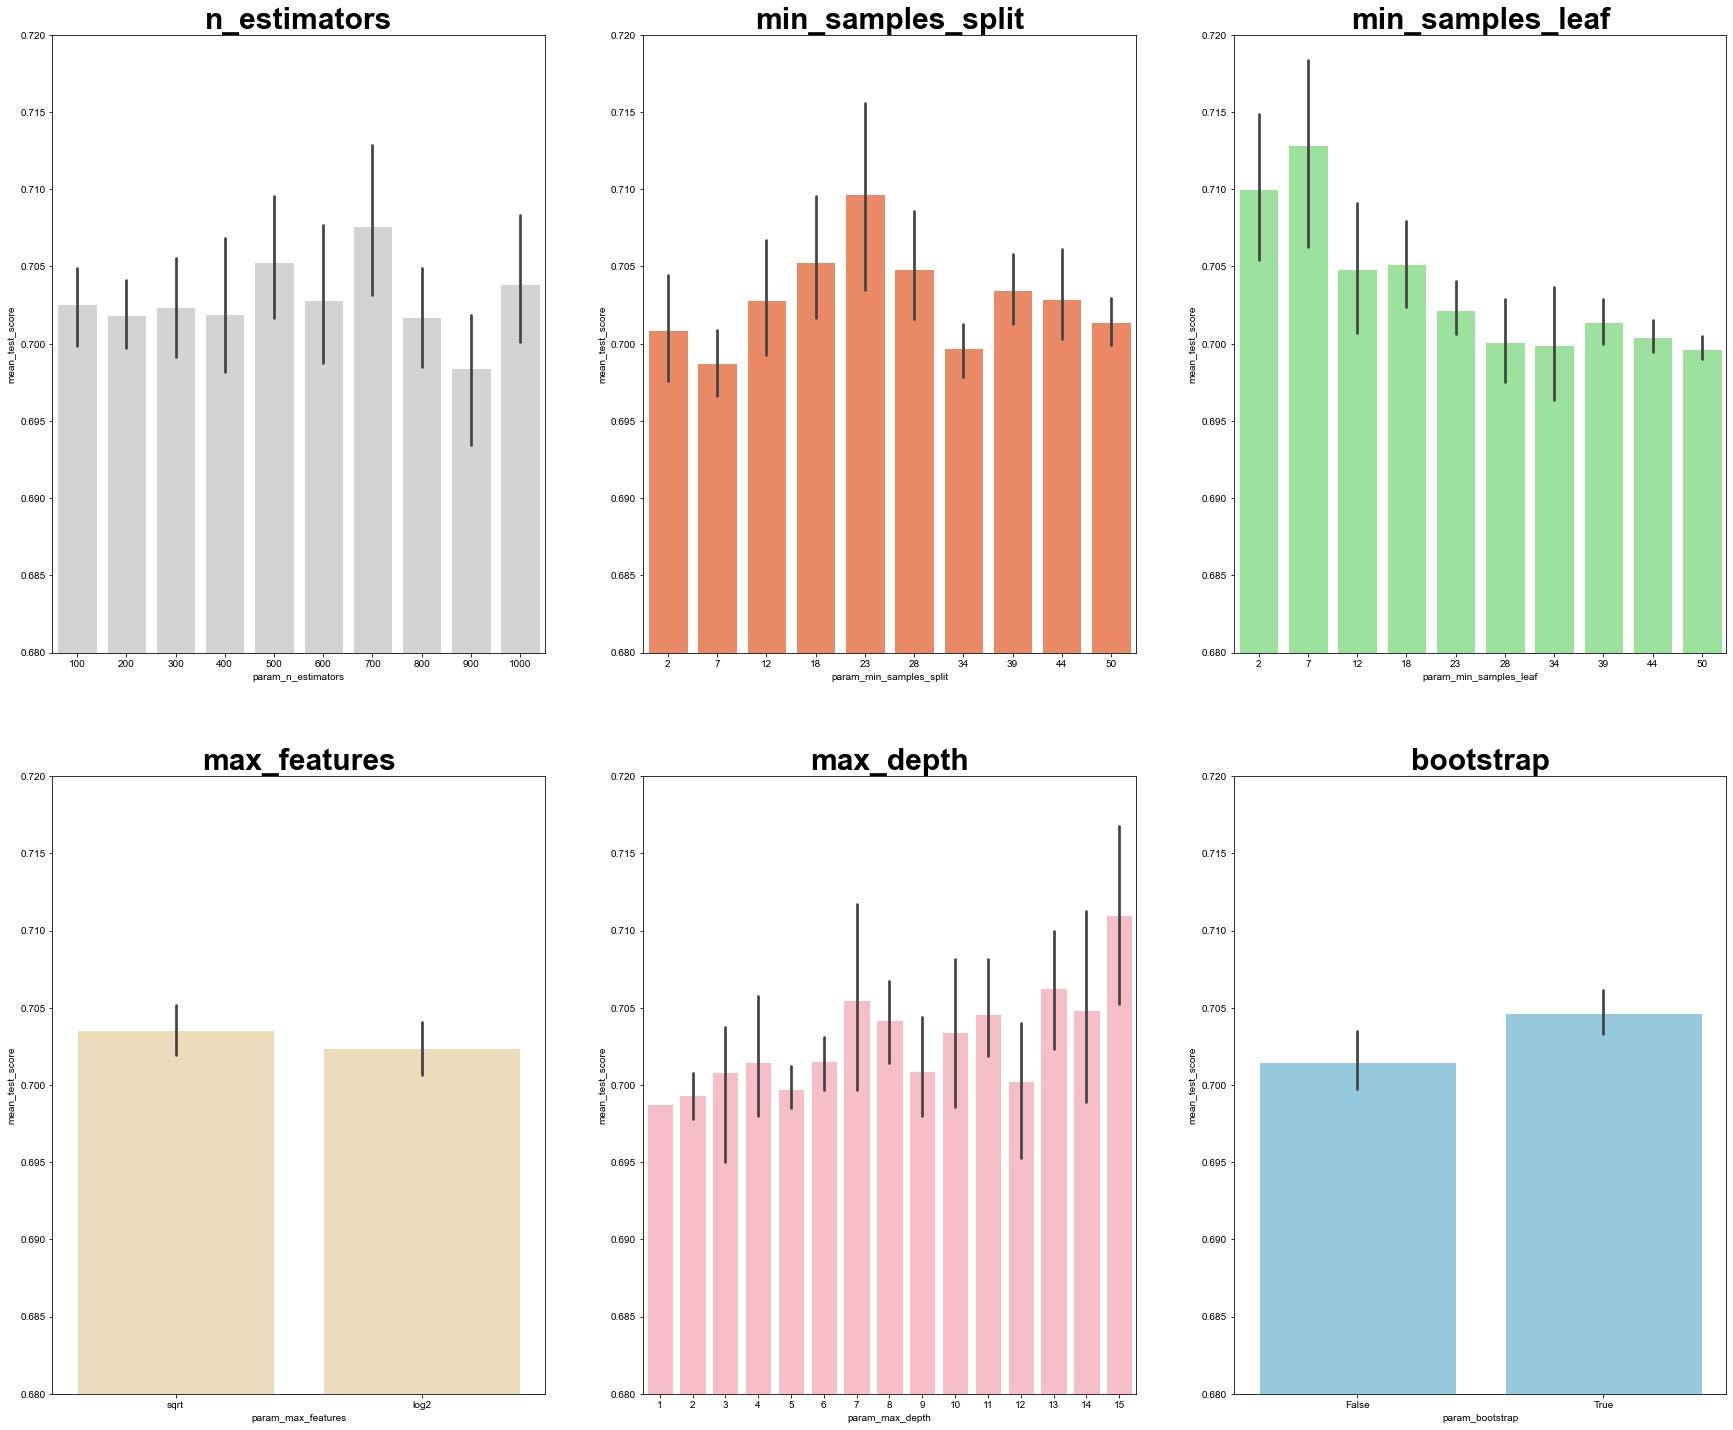

In [120]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.68,.72])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.68,.72])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.68,.72])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.68,.72])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.68,.72])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.68,.72])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

Для более точного подбора гиперпараметров воспользуемся GridSearchCV. В нем прогоняются все возможные коминации гиперпараметров, в отличии от RandomizedSearchCV, где мы самостоятельно задаем количесвто итераций поиска.

In [121]:
from sklearn.model_selection import GridSearchCV

# записываем лучшие подобранные параметры
n_estimators = [100,200,300]
min_samples_split = [18,28,39,2]
min_samples_leaf = [12,23,28,34]
max_features = ['log2']
max_depth = [2,3,9]
bootstrap = [True]

# создаем словарь параметров
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

model = RandomForestClassifier()

# инициализируем функцию подбора параметров
gs = GridSearchCV(model, 
                  param_grid, 
                  verbose = 1, # уровень детализации
                  n_jobs=-1) # использование всех процессов для параллельного выполнения

gs.fit(x_train_scaled, y_train)
print(gs.best_estimator_)
print(gs.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=12,
                       n_estimators=300)
{'bootstrap': True, 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 12, 'min_samples_split': 2, 'n_estimators': 300}


Обучаем модель и смотрим на результаты

In [122]:
model = RandomForestClassifier()

start = time.time() # точка отсчета времени
model.fit(x_train_scaled, y_train)
y_pred_gs = gs.best_estimator_.predict(x_test_scaled)
end = time.time() - start # время работы программы
returned = get_metrics(y_test, y_pred_gs).append(pd.Series((end), index = ['time']))

In [124]:
scores_ht.iloc[1] = returned

In [125]:
scores_ht

,accuracy,precision,recall,f1_score,time
RF,0.705,0.5,0.237288,0.321839,0.200012
RF + HT,0.715,0.5625,0.152542,0.24,0.247971


## Вариант 4

Вариант 4. Выбор признаков.
Данный вариант предполагает фокусировку на улучшении модели путем ввода новых признаков в модель. Следует подготовить модель к обучению, обучить модель и зафиксировать начальный уровень эффективности. Затем следует исследовать влияние исключения существующих и введения новых признаков в модель на эффективность. Как вариант можно рассматривать введение полиномиальных признаков. Следует стремиться к максимальному увеличению эффективности модели.


https://habr.com/ru/company/nix/blog/425253/

In [44]:
# импорт библиотек
import numpy as np
import pandas as pd

# загрузка данных из файла
data = pd.read_csv('sp500hst.txt')
cols = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']
data.columns = cols
data.head(5)

,Date,Ticker,Open,High,Low,Close,Volume
0,20090824,A,25.64,25.7400,25.330,25.50,22247
1,20090825,A,25.50,25.7000,25.225,25.34,30891
2,20090826,A,25.32,25.6425,25.145,25.48,33334
3,20090827,A,25.50,25.5700,25.230,25.54,70176
4,20090828,A,25.67,26.0500,25.630,25.83,39694


- Применим к категориальным переменным one-hot кодирование
- Добавим взятие натурального логарифма от всех числовых переменных

In [47]:
# копирование данных
features = data.copy()

# выбор числовых признаков
numeric_subset = data.select_dtypes('number')

# Создание столбцов с log для числовых признаков
for col in numeric_subset.columns:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# выбор категориальных признаков
categorical_subset = data[['Ticker']]

# one-hot кодировка
categorical_subset = pd.get_dummies(categorical_subset)

# соединение двух датафреймов путем конкатинации
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# вывод результата
features.head()

,Date,Open,High,Low,Close,Volume,log_Date,log_Open,log_High,log_Low,...,Ticker_XL,Ticker_XLNX,Ticker_XOM,Ticker_XRAY,Ticker_XRX,Ticker_XTO,Ticker_YHOO,Ticker_YUM,Ticker_ZION,Ticker_ZMH
0,20090824,25.64,25.7400,25.330,25.50,22247,16.815774,3.244154,3.248046,3.231989,...,0,0,0,0,0,0,0,0,0,0
1,20090825,25.50,25.7000,25.225,25.34,30891,16.815774,3.238678,3.246491,3.227836,...,0,0,0,0,0,0,0,0,0,0
2,20090826,25.32,25.6425,25.145,25.48,33334,16.815774,3.231595,3.244251,3.224659,...,0,0,0,0,0,0,0,0,0,0
3,20090827,25.50,25.5700,25.230,25.54,70176,16.815774,3.238678,3.241420,3.228034,...,0,0,0,0,0,0,0,0,0,0
4,20090828,25.67,26.0500,25.630,25.83,39694,16.815774,3.245323,3.260018,3.243764,...,0,0,0,0,0,0,0,0,0,0


Признаки, которые сильно коррелируют друг с другом, называются коллинеарными. Удаление одной переменной в таких парах признаков часто помогает модели обобщать и быть более интерпретируемой

In [49]:
# строим матрицу корреляций
correll = data.corr()
correll

,Date,Open,High,Low,Close,Volume
Date,1.000000,0.038518,0.038582,0.037759,0.038292,0.008563
Open,0.038518,1.000000,0.999872,0.999811,0.999753,-0.089708
High,0.038582,0.999872,1.000000,0.999763,0.999868,-0.089506
Low,0.037759,0.999811,0.999763,1.000000,0.999843,-0.090128
Close,0.038292,0.999753,0.999868,0.999843,1.000000,-0.089910
Volume,0.008563,-0.089708,-0.089506,-0.090128,-0.089910,1.000000


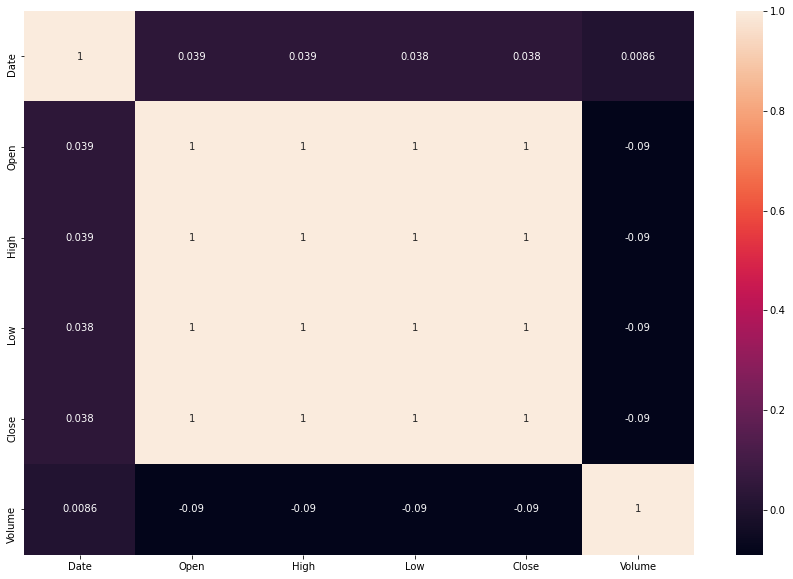

In [50]:
import seaborn as sns

# строим тепловую карту корреляций
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correll, annot=True);

In [52]:
# удалем столбцы с корреляцией близкой к 1
data.drop(columns=['High', 'Low'], axis=1, inplace=True)
data.head()

,Date,Ticker,Open,Close,Volume
0,20090824,A,25.64,25.50,22247
1,20090825,A,25.50,25.34,30891
2,20090826,A,25.32,25.48,33334
3,20090827,A,25.50,25.54,70176
4,20090828,A,25.67,25.83,39694


In [48]:
# удаляем признак со всеми пропущенными значениями
features  = features.dropna(axis=1, how = 'all')
print(features.shape)

(122573, 536)


## Вариант 5

Вариант 5. Исследование влияния обучения без учителя на эффективность обучения.
Данный вариант предполагает фокусировку на использовании методов обучения без учителя для ускорения или повышения эффективности обучения с учителем. Следует подготовить модель к обучению, обучить модель и зафиксировать начальный уровень эффективности. Затем следует попробовать применить понижение размерности, обнаружение аномалий или кластеризацию (в любой комбинации) для трансформации исходного датасета. В конце работы следует сделать значимый вывод об изменении скорости и эффективности обучения с учителем.


# Обучение нескольких моделей классификация

## 1. Описание датасета и решаемой задачи 

Датасет включает в себя описания гипотетических образцов, соответствующих 23 видам грибов семейства Agaricus и Lepiota. Каждый образец идентифицирован как съедобный или ядовитый. Решаемая задача - задача классифиции.

## 2. Импорты

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import (
    make_scorer, accuracy_score, f1_score, precision_score,
    recall_score, roc_curve, auc)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

## 3. Подготовительный этап

Загружаем датасет в Python.

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Исходный датасет содержит 8124 точек данных и 23 переменные.

In [3]:
df.shape

(8124, 23)

Отсутствующие значения в выборке не обнаружены.

In [4]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Выделяем признаки и целевую переменную.

In [5]:
X = df.drop(columns=['class'])
y = df['class']

Используем способ "One Hot Encoding" для кодирования категориальных признаков.

In [6]:
X = pd.get_dummies(X)

Разделяем выборку на обучающую и тестовую в соотношении 80% и 20%.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

## 4. Обучение моделей

В качестве классификаторов будем использовать логистическую регрессию, метод опорных векторов с гауссовым ядром, k ближайших соседей и многослойных перцептрон.

In [8]:
clfs = (
    LogisticRegression(),
    SVC(probability=True),
    KNeighborsClassifier(),
    MLPClassifier()
)

***Внимание! ROC-AUC строится только для бинарной классификации.***

Построим ROC-кривые и определим прощадь под ними (AUC). Все модели имеют отличные показатели.

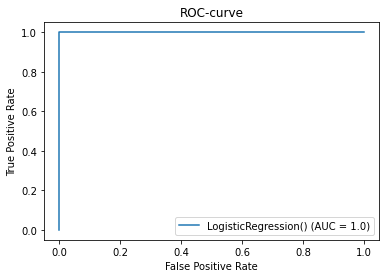

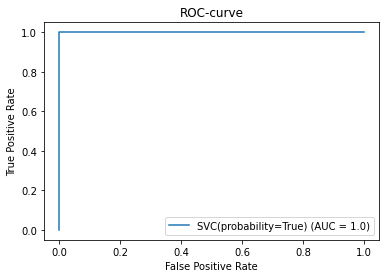

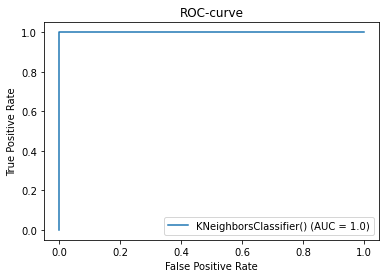

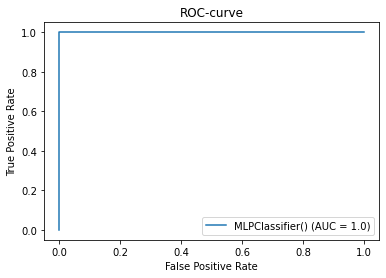

In [10]:
for clf in clfs:
    clf.fit(X_train, y_train)
    fpr, tpr, treshold = roc_curve(
        y_test, clf.predict_proba(X_test)[:, 1], pos_label='p')
    plt.plot(fpr, tpr, label=f'{str(clf)} (AUC = {auc(fpr, tpr)})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-curve')
    plt.legend()
    plt.show()

В качестве метрик качества будем использовать accuracy, precision, recall и f1.

In [11]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label='p'),
    'recall': make_scorer(recall_score, pos_label='p'),
    'f1': make_scorer(f1_score, pos_label='p')
}

Для определения эффективности моделей будем считать усредненные метрики в процессе проведения кросс-валидации. Она необходима, чтобы понимать, насколько полученные метрики валидны и подобрать на их основании наиболее эффективную модель.

In [12]:
scores = {}
for clf in clfs:
    metrics = {
        metric: values.mean()
        for metric, values in cross_validate(
            clf, X_train, y_train, scoring=scoring).items()
    }
    scores[type(clf).__name__] = metrics

Все модели показывают отличные результаты, поэтому в данном случае стоит основываться на времени обучения. Быстрее всего обучилась модель KNeighborsClassifier.

In [13]:
pd.DataFrame(scores)

,LogisticRegression,SVC,KNeighborsClassifier,MLPClassifier
fit_time,0.122959,2.813686,0.004607,1.40219
score_time,0.032012,0.204782,0.240184,0.02777
test_accuracy,1.000000,1.000000,1.000000,1.00000
test_precision,1.000000,1.000000,1.000000,1.00000
test_recall,1.000000,1.000000,1.000000,1.00000
test_f1,1.000000,1.000000,1.000000,1.00000


## 5. Построение итоговой модели

Обучим выбранную модель на тренировочных данных и сделаем предсказание на тестовых данных.

In [14]:
clf = KNeighborsClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)

Рассмотрим основные метрики эффективности: accuracy, precision, recall и f1.

In [15]:
accuracy_score(y_test, y_pred)

1.0

In [16]:
precision_score(y_test, y_pred, pos_label='p')

1.0

In [17]:
recall_score(y_test, y_pred, pos_label='p')

1.0

In [18]:
f1_score(y_test, y_pred, pos_label='p')

1.0

Наблюдаются отличные метрики, следовательно модель обучена отлично. Обученная модель может быть применима в практических целях.

# Обучение нескольких моделей регрессия

## 1. Описание датасета и решаемой задачи 

Датасет включает в себя выборку автомобилей с различными харатеристиками. Решаемая задача - задача множественной регрессии. Целевая переменная - цена автомобиля.

## 2. Импорты

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import (
    make_scorer, r2_score, mean_absolute_error, mean_absolute_percentage_error,
    mean_squared_error)

## 3. Подготовительный этап

Загружаем датасет в Python.

In [20]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Исходный датасет содержит 205 точек данных и 26 переменных.

In [21]:
df.shape

(205, 26)

Отсутствующие значения в выборке не обнаружены.

In [22]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Исключаем ненужные переменные.

In [23]:
df = df.drop(columns=['car_ID'])

В столбце с названиями автомобилей достаточно много уникальных значений. Это плохой признак. Однако, можно выбрать из названий моделей марки автомобилей.

In [24]:
df['CarName'].nunique()

147

In [25]:
df['CarName'] = df['CarName'].str.split(' ',expand=True)[0].replace({
    'maxda': 'mazda',
    'nissan': 'Nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota', 
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
})

In [26]:
df['CarName'].nunique()

22

Выделяем признаки и целевую переменную.

In [27]:
X = df.drop(columns=['price'])
y = df['price']

Используем способ "One Hot Encoding" для кодирования категориальных признаков.

In [28]:
X = pd.get_dummies(X)

Разделяем выборку на обучающую и тестовую в соотношении 80% и 20%.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

## 4. Обучение моделей


В качестве классификаторов будем использовать логистическую регрессию, метод опорных векторов с гауссовым ядром, k ближайших соседей и многослойных перцептрон.

In [30]:
rgs = (
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
)

В качестве метрик качества будем использовать коэффициент детерминации, корень из средней квадратичной ошибки RMSE (root mean squared error), cреднюю абсолютную ошибку MAE (mean absolute error) и среднюю абсолютную процентную ошибку MAPE (mean absolute percentage error).

In [31]:
scoring = {
    'r2': make_scorer(r2_score),
    'rmse': make_scorer(mean_squared_error, squared=False),
    'mae': make_scorer(mean_absolute_error),
    'mape': make_scorer(mean_absolute_percentage_error)
}

Для определения эффективности моделей будем считать усредненные метрики в процессе проведения кросс-валидации. Она необходима, чтобы понимать, насколько полученные метрики валидны и подобрать на их основании наиболее эффективную модель.

In [32]:
scores = {}
for rg in rgs:
    metrics = {
        metric: values.mean()
        for metric, values in cross_validate(
            rg, X_train, y_train, scoring=scoring).items()
    }
    scores[type(rg).__name__] = metrics

Наилучшие показатели метрик оказались у RandomForestRegressor и GradientBoostingRegressor: коэффициент детерминации R2 наиболее близок к 1, а ошибки минимальны. Однако, время обучения RandomForestRegressor значительно больше, чем у GradientBoostingRegressor. Поэтому выбираем GradientBoostingRegressor.

In [33]:
pd.DataFrame(scores)

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor
fit_time,0.026793,0.006282,0.230033,0.064576
score_time,0.003390,0.003237,0.015615,0.001865
test_r2,0.840365,0.742050,0.877117,0.872082
test_rmse,2662.219863,3394.117315,2368.873851,2410.505019
test_mae,1952.291275,2239.010604,1654.085149,1713.934278
test_mape,0.159005,0.165386,0.125315,0.126505


## 5. Построение итоговой модели

Обучим выбранную модель на тренировочных данных и сделаем предсказание на тестовых данных.

In [34]:
rg = GradientBoostingRegressor().fit(X_train, y_train)
y_pred = rg.predict(X_test)

Рассмотрим основные метрики эффективности: accuracy, precision, recall и f1.

In [35]:
r2_score(y_test, y_pred)

0.9439513251820283

In [36]:
mean_squared_error(y_test, y_pred, squared=False)

2368.935661104685

In [37]:
mean_absolute_error(y_test, y_pred)

1622.083108057101

In [38]:
mean_absolute_percentage_error(y_test, y_pred)

0.10026935708819024

Наблюдаются хорошие метрики, следовательно модель обучена хорошо. Обученная модель может быть применима в практических целях.